In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('J:/Data science/ML\Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/hearing_test.csv')
print(df.head())

    age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1


In [57]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

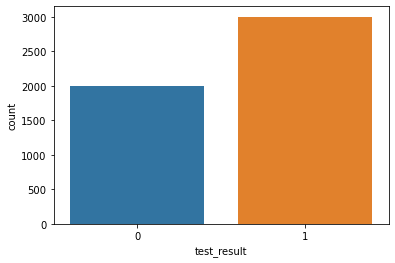

In [58]:
sns.countplot(data = df , x='test_result')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

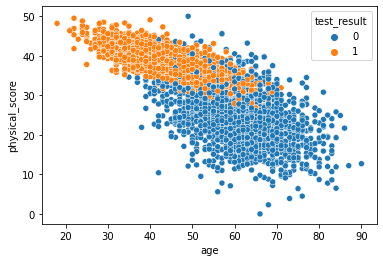

In [59]:
sns.scatterplot(data = df , x='age' , y='physical_score' , hue='test_result')

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

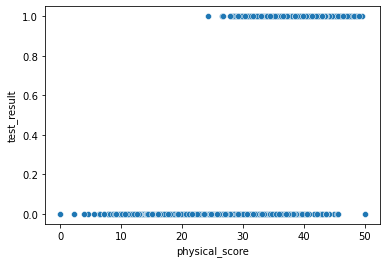

In [60]:
sns.scatterplot(data=df , x='physical_score' , y='test_result')

<AxesSubplot:xlabel='age', ylabel='test_result'>

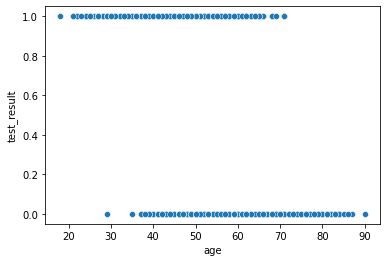

In [61]:
sns.scatterplot(data=df , x='age' , y='test_result')

In [62]:
x = df.drop('test_result' , axis=1)
y = df['test_result']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

In [65]:
scaler = StandardScaler()

In [66]:
scaled_x_train = scaler.fit_transform(x_train)

In [67]:
scaled_x_test = scaler.fit_transform(x_test)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
log_model = LogisticRegression()

In [70]:
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [71]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [73]:
y_pred = log_model.predict(scaled_x_test)

In [74]:
acc_score = accuracy_score(y_test , y_pred)
acc_score

0.924

In [75]:
conf_matrix = confusion_matrix(y_test , y_pred)
conf_matrix

array([[173,  20],
       [ 18, 289]], dtype=int64)

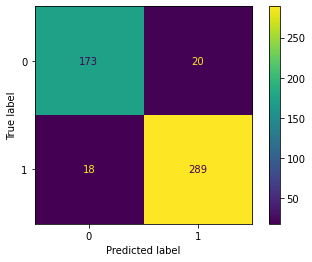

In [76]:
plt_conf = plot_confusion_matrix(log_model,scaled_x_test,y_test)
plt_conf

In [78]:
from sklearn.metrics import precision_score,recall_score

In [79]:
prec_score = precision_score(y_test,y_pred)
prec_score

0.9352750809061489

In [80]:
rec_score = recall_score(y_test,y_pred)
rec_score

0.9413680781758957

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [99]:
log_model.predict_proba(scaled_x_test)[0]

array([0.03092672, 0.96907328])

In [85]:
x_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [86]:
y_train.iloc[0]

1

In [87]:
log_model.predict(scaled_x_test)

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [102]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

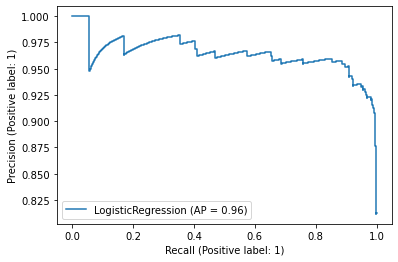

In [103]:
plot_precision_recall_curve(log_model,scaled_x_test,y_test)

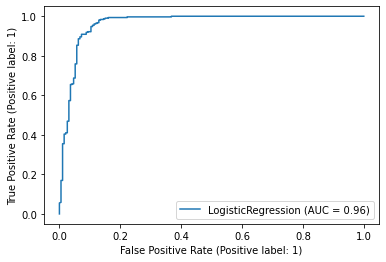

In [97]:
plot_roc_curve(log_model,scaled_x_test,y_test)

In [104]:
from sklearn.metrics import roc_auc_score

In [105]:
roc_auc_score(y_test,y_pred)

0.9188705675853572